In [44]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
# Construct a list that contains the number of neurons of each layer in your network.
structure = input("Enter the number of neurons of each layer in your network").split(' ')
structure = [int(x) for x in structure]
print(structure)    

[4, 2, 2, 3]


In [3]:
# Construct a list that contains all the bias vectors of your network(_n means it has all vectors)
np.random.seed(123)
B_n = [np.random.randn(l, 1) for l in structure[1:]]
print("bias vector of each layer\n")
for B in B_n:
    print(B)
    print()

bias vector of each layer

[[-1.0856306 ]
 [ 0.99734545]]

[[ 0.2829785 ]
 [-1.50629471]]

[[-0.57860025]
 [ 1.65143654]
 [-2.42667924]]



In [4]:
# Construct a list that contains all the weight matrices of your network(_n means it has all matrices)
np.random.seed(123)
W_n = [np.random.randn(l, next_l) for l, next_l in zip(structure[:-1], structure[1:])]
print("weight matrix of each layer\n")
for W in W_n:
    print(W)
    print()

weight matrix of each layer

[[-1.0856306   0.99734545]
 [ 0.2829785  -1.50629471]
 [-0.57860025  1.65143654]
 [-2.42667924 -0.42891263]]

[[ 1.26593626 -0.8667404 ]
 [-0.67888615 -0.09470897]]

[[ 1.49138963 -0.638902   -0.44398196]
 [-0.43435128  2.20593008  2.18678609]]



##### Load training and test datasets

In [5]:
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data = load_iris()['data']
target = load_iris()['target']

print(type(data), type(target))
print(data.shape, target.shape)
print(len(data), len(target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(150, 4) (150,)
150 150


In [20]:
ind = np.arange(150)
np.random.shuffle(ind)
indexes = ind.tolist()
print(type(indexes))
print(indexes)

<class 'list'>
[134, 74, 108, 47, 8, 18, 121, 36, 118, 60, 97, 42, 66, 43, 106, 133, 92, 62, 26, 11, 122, 52, 109, 55, 84, 107, 17, 129, 105, 16, 100, 143, 49, 78, 57, 142, 149, 14, 30, 75, 144, 1, 102, 3, 104, 139, 56, 13, 58, 90, 87, 28, 119, 128, 147, 82, 132, 15, 48, 117, 10, 44, 148, 65, 50, 101, 61, 140, 7, 95, 126, 91, 96, 12, 4, 115, 9, 79, 88, 46, 138, 141, 64, 37, 131, 35, 2, 98, 72, 83, 116, 24, 19, 0, 38, 86, 33, 63, 112, 39, 85, 94, 123, 54, 76, 59, 130, 67, 40, 111, 25, 99, 81, 89, 51, 71, 5, 70, 29, 124, 68, 73, 93, 23, 41, 125, 22, 77, 34, 135, 53, 146, 114, 31, 110, 20, 21, 45, 27, 103, 137, 113, 120, 145, 127, 6, 69, 80, 136, 32]


In [21]:
# Just pick up 5 indexes out of dataset randomly
ind = np.arange(150)
np.random.shuffle(ind)
indexes = ind.tolist()

data = data[indexes]
target = target[indexes]

print(data)
print()
print(target)

[[6.7 3.1 5.6 2.4]
 [7.6 3.  6.6 2.1]
 [5.1 3.8 1.9 0.4]
 [4.6 3.6 1.  0.2]
 [6.6 2.9 4.6 1.3]
 [5.9 3.  4.2 1.5]
 [6.3 3.4 5.6 2.4]
 [5.  3.5 1.6 0.6]
 [5.8 2.6 4.  1.2]
 [4.6 3.2 1.4 0.2]
 [6.3 2.5 4.9 1.5]
 [5.3 3.7 1.5 0.2]
 [6.7 3.  5.  1.7]
 [7.1 3.  5.9 2.1]
 [6.1 2.6 5.6 1.4]
 [4.9 3.6 1.4 0.1]
 [5.1 3.8 1.6 0.2]
 [6.  3.  4.8 1.8]
 [4.6 3.1 1.5 0.2]
 [6.8 2.8 4.8 1.4]
 [4.6 3.4 1.4 0.3]
 [6.3 2.5 5.  1.9]
 [5.  2.  3.5 1. ]
 [5.7 2.8 4.1 1.3]
 [5.1 2.5 3.  1.1]
 [5.6 2.8 4.9 2. ]
 [6.3 2.7 4.9 1.8]
 [6.3 3.3 6.  2.5]
 [6.9 3.2 5.7 2.3]
 [5.5 4.2 1.4 0.2]
 [7.7 3.8 6.7 2.2]
 [5.5 2.5 4.  1.3]
 [6.4 3.2 4.5 1.5]
 [7.  3.2 4.7 1.4]
 [4.8 3.  1.4 0.1]
 [7.7 2.6 6.9 2.3]
 [6.3 2.9 5.6 1.8]
 [5.  3.4 1.5 0.2]
 [6.2 2.8 4.8 1.8]
 [5.  3.6 1.4 0.2]
 [5.  3.  1.6 0.2]
 [7.4 2.8 6.1 1.9]
 [6.1 2.8 4.  1.3]
 [4.7 3.2 1.3 0.2]
 [6.1 2.8 4.7 1.2]
 [5.2 3.4 1.4 0.2]
 [6.4 2.8 5.6 2.2]
 [4.4 3.  1.3 0.2]
 [5.4 3.  4.5 1.5]
 [6.5 3.2 5.1 2. ]
 [5.1 3.8 1.5 0.3]
 [6.7 3.3 5.7 2.1]
 [5.4 3.4 1.

In [22]:
X = data
print(X)
print()

Y = np.zeros((len(X), 3))
for i in range(len(Y)):
    for j in range(len(Y[i])):
        Y[i, target[i]] = 1
print(Y)

[[6.7 3.1 5.6 2.4]
 [7.6 3.  6.6 2.1]
 [5.1 3.8 1.9 0.4]
 [4.6 3.6 1.  0.2]
 [6.6 2.9 4.6 1.3]
 [5.9 3.  4.2 1.5]
 [6.3 3.4 5.6 2.4]
 [5.  3.5 1.6 0.6]
 [5.8 2.6 4.  1.2]
 [4.6 3.2 1.4 0.2]
 [6.3 2.5 4.9 1.5]
 [5.3 3.7 1.5 0.2]
 [6.7 3.  5.  1.7]
 [7.1 3.  5.9 2.1]
 [6.1 2.6 5.6 1.4]
 [4.9 3.6 1.4 0.1]
 [5.1 3.8 1.6 0.2]
 [6.  3.  4.8 1.8]
 [4.6 3.1 1.5 0.2]
 [6.8 2.8 4.8 1.4]
 [4.6 3.4 1.4 0.3]
 [6.3 2.5 5.  1.9]
 [5.  2.  3.5 1. ]
 [5.7 2.8 4.1 1.3]
 [5.1 2.5 3.  1.1]
 [5.6 2.8 4.9 2. ]
 [6.3 2.7 4.9 1.8]
 [6.3 3.3 6.  2.5]
 [6.9 3.2 5.7 2.3]
 [5.5 4.2 1.4 0.2]
 [7.7 3.8 6.7 2.2]
 [5.5 2.5 4.  1.3]
 [6.4 3.2 4.5 1.5]
 [7.  3.2 4.7 1.4]
 [4.8 3.  1.4 0.1]
 [7.7 2.6 6.9 2.3]
 [6.3 2.9 5.6 1.8]
 [5.  3.4 1.5 0.2]
 [6.2 2.8 4.8 1.8]
 [5.  3.6 1.4 0.2]
 [5.  3.  1.6 0.2]
 [7.4 2.8 6.1 1.9]
 [6.1 2.8 4.  1.3]
 [4.7 3.2 1.3 0.2]
 [6.1 2.8 4.7 1.2]
 [5.2 3.4 1.4 0.2]
 [6.4 2.8 5.6 2.2]
 [4.4 3.  1.3 0.2]
 [5.4 3.  4.5 1.5]
 [6.5 3.2 5.1 2. ]
 [5.1 3.8 1.5 0.3]
 [6.7 3.3 5.7 2.1]
 [5.4 3.4 1.

In [9]:
# B_n is a list of 3 np.ndarrays with (2, 1),(2, 1),(3, 1)
# W_n is a list of 3 np.ndarrays with (4, 2),(2, 2),(2, 3)

# X is a np.ndarray with shape (150,4)
# Y is a np.ndarray with shape (150,3)

# Z_n is a list of 3 np.ndarrays with (2,1),(2,1),(3,1)
# A_n is a list of 3 np.ndarrays with (2,1),(2,1),(3,1)

# e_Je_B_ns a list of 3 np.ndarrays with (2,1), (2,1), (3,1)
# e_Je_W_ns a list of 3 np.ndarrays with (4,2), (2,2), (2,3)

In [26]:
# Provide sigmoid and sigmoid_derivative function
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1.0 - sigmoid(x))

In [36]:
# Calculate the Loss
def calculate_loss(actual, expected):
    diff = np.sum(np.sqrt((actual.reshape(-1) - expected) * (actual.reshape(-1) - expected)))
    return diff

In [29]:
a = np.array([[0.3],[0.8],[0.1]])
y = [0, 1, 0]

#print(calculate_loss(a, y))
print((a.reshape(-1) - y)) 
print((a.reshape(-1) - y) * (a.reshape(-1) - y)) 
print(np.sqrt((a.reshape(-1) - y) * (a.reshape(-1) - y)))
print(np.sum(np.sqrt((a.reshape(-1) - y) * (a.reshape(-1) - y))))

print(calculate_loss(2, a, y))

[ 0.3 -0.2  0.1]
[0.09 0.04 0.01]
[0.3 0.2 0.1]
0.6
2th error : 0.6
None


In [33]:
a = [2,4,6]
np.mean(a)

4.0

In [48]:
# Set the output layer to H and let L begin from the first hidden layer(not from the input layer)
H = len(structure) - 2
learning_rate = 0.05
epochs = 100
total_error_epoch = []

for epoch in range(epochs):

    # Create a list that contains errors of all data points for each epoch
    epoch_errors = []
    
    for x, y in zip(X, Y):     # x의 shape:(4,),  y의 shape:(3,)        
        
        W_n = [np.random.randn(l, next_l) for l, next_l in zip(structure[:-1], structure[1:])]        
        B_n = [np.random.randn(l, 1) for l in structure[1:]]
        
        # Forward Propagate
        # Create two lists that contain pre and post activation vector of each layer, respectively
        Z_n, A_n = [], []
        
        for i, (b, W) in enumerate(zip(B_n, W_n)):
            if i == 0:
                z = np.dot(np.array(W).T, x).reshape(-1, 1) + np.array(b)
            else:
                z = np.dot(np.array(W).T, a).reshape(-1, 1) + np.array(b)
            a = sigmoid(z)

            Z_n.append(z)
            A_n.append(a)
        # print(Z_n) 
        # print()  
    
    
        # Backpropagate
        # Initialize a list called e_Je_W_ns that will contain e_Je_W matrices for each layer
        e_Je_W_ns = [np.zeros(W.shape) for W in W_n]    # (4, 2), (2, 2), (2, 3)
        #for x in e_Je_W_ns:
        #    print(x.shape)
        #print()

        # Initialize a list called e_Je_B_ns that will contain e_Je_B vectors for each layer
        e_Je_B_ns = [np.zeros(B.shape) for B in B_n]    # (2, 1), (2, 1), (3, 1)
        
        for L in range(H, -1, -1):
            if L != H:
                delta = sigmoid_derivative(Z_n[L]) * np.dot(W_n[L+1], delta)
            else:
                delta = sigmoid_derivative(Z_n[L]) * (A_n[L] - y.reshape(-1, 1))
                
            e_Je_B_ns[L] = delta
            # print(f"{L} : {delta}")
            
            if L != 0:
                e_Je_W_ns[L] = np.dot(A_n[L-1], delta.T)
            else:
                e_Je_W_ns[L] = np.dot(x.reshape(-1, 1), delta.T)
    
        """
        for x in e_Je_W_ns:
            print(x)
        print()
        """
        
        
        for i, (wn, ejew, bn, ejeb) in enumerate(zip(W_n, e_Je_W_ns, B_n, e_Je_B_ns)):
            W_n[i] -= learning_rate/len(X) * ejew
            B_n[i] -= learning_rate/len(X) * ejeb
            """
            print(wn)
            print(ejew)
            print(bn)
            print(ejeb)
            print()
            """    
    
        datapoint_error = calculate_loss(A_n[-1], y)
        epoch_errors.append(datapoint_error)
    total_errors = np.sum(epoch_errors)
    total_error_epoch.append(total_errors)
    print(f"{epoch:3d}th total error : {total_errors:.3f}")

  0th total error : 227.026
  1th total error : 221.022
  2th total error : 227.731
  3th total error : 231.903
  4th total error : 219.654
  5th total error : 217.996
  6th total error : 218.227
  7th total error : 223.975
  8th total error : 225.780
  9th total error : 229.882
 10th total error : 225.042
 11th total error : 230.449
 12th total error : 229.208
 13th total error : 222.693
 14th total error : 220.157
 15th total error : 235.159
 16th total error : 229.359
 17th total error : 218.410
 18th total error : 215.681
 19th total error : 229.526
 20th total error : 217.036
 21th total error : 220.237
 22th total error : 228.724
 23th total error : 224.203
 24th total error : 226.626
 25th total error : 222.743
 26th total error : 221.254
 27th total error : 226.488
 28th total error : 231.827
 29th total error : 224.970
 30th total error : 224.506
 31th total error : 230.471
 32th total error : 228.393
 33th total error : 223.709
 34th total error : 232.389
 35th total error : 

In [53]:
len(X)

150

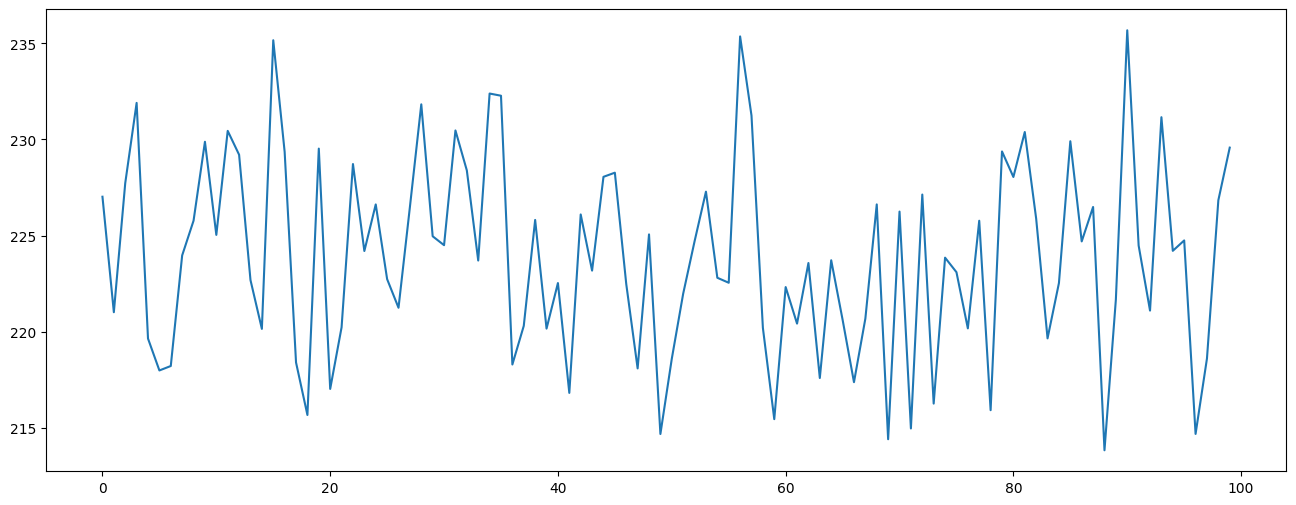

In [55]:
plt.figure(figsize=(16, 6))
plt.plot(total_error_epoch)
plt.show()